# Linear Fits

Attempting to find a fit between reactor build and power

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

sns.set_style({'font.sans-serif':'Laksaman'})

In [2]:
#dr = pd.read_csv("./datasets_clean/all_reactors.csv")
dr = pd.read_csv("./datasets_clean/2021Table14_clean.csv")
dr.head()

,Country,Code,Name,Type,Model,Thermal,Gross,Net,Operator,Supplier,Start,Connection,Operation,Shutdown,EAF,UCF,NEA,Status,Construction_time
0,ARGENTINA,AR -1,ATUCHA-1,PHWR,PHWR KWU,1179,362,340,NASA,SIEMENS,1968-06-01,1974-03-01,1974-06-01 00:00:00,NaN,74.6,75.5,-,Online,2099
1,ARGENTINA,AR -2,EMBALSE,PHWR,CANDU 6,2064,656,608,NASA,AECL,1974-04-01,1983-04-01,1984-01-01 00:00:00,NaN,78.7,78.9,-,Online,3287
2,ARGENTINA,AR -3,ATUCHA-2,PHWR,PHWR KWU,2160,745,693,NASA,SIEMENS,1981-07-01,2014-06-01,2016-05-01 00:00:00,NaN,53.9,53.9,-,Online,12023
3,ARMENIA,AM -19,ARMENIAN-2,PWR,VVER V-270,1375,451,448,ANPPCJSC,FAEA,1975-07-01,1980-01-01,1980-05-01 00:00:00,NaN,65.0,67.0,-,Online,1645
4,BELARUS,BY -1,BELARUSIAN-1,PWR,VVER V-491,3200,1194,1110,BelNPP,JSC ASE,2013-11-01,2020-11-01,2021-06-01 00:00:00,NaN,58.7,58.7,-,Online,2557


In [3]:
dr.dtypes

Country               object
Code                  object
Name                  object
Type                  object
Model                 object
Thermal                int64
Gross                  int64
Net                    int64
Operator              object
Supplier              object
Start                 object
Connection            object
Operation             object
Shutdown              object
EAF                  float64
UCF                  float64
NEA                   object
Status                object
Construction_time      int64
dtype: object

In [4]:
xnet = np.linspace(0, 1700)

In [5]:
# Time is in days
dr['ctime_y'] = dr["Construction_time"]/365.0
dr['Start'] = pd.to_datetime(dr['Start'])
dr['year_int'] = dr['Start'].dt.year.astype(int)

coef = np.polyfit(dr['Net'].values, dr['ctime_y'].values, 1)
xnet_all = np.linspace(0, 1700)
netfit_all = xnet * coef[0] + coef[1]

In [6]:
yearsthres = 20
coef_t = np.polyfit(dr['Net'][dr['ctime_y']<yearsthres].values, dr['ctime_y'][dr['ctime_y']<yearsthres].values, 1)
xnet = np.linspace(0, 1700)
netfit_t = xnet * coef_t[0] + coef_t[1]

/tmp/ipykernel_25715/1883923066.py:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


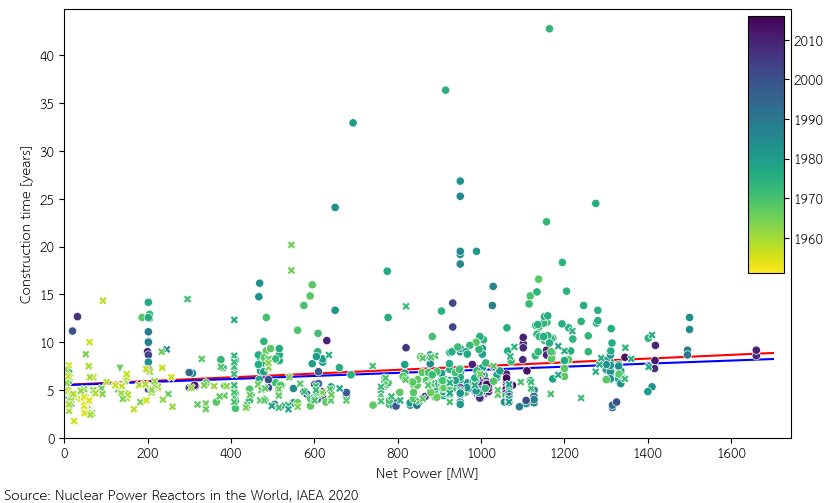

In [9]:
fig, ax = plt.subplots(figsize=(8,5))
markers = {'Online': "o", 'Shutdown': "X", 'Decommissioning':'v'}

sc = sns.scatterplot(x='Net', y='ctime_y', data=dr, hue='year_int', palette='viridis_r', ax=ax, style='Status', markers=markers)
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

ax.plot(xnet_all, netfit_all, color='r', zorder=-1)
ax.plot(xnet_all, netfit_t, color='b', zorder=-1)

ax.set_xlabel("Net Power [MW]")
ax.set_ylabel("Construction time [years]")
plt.legend("")

###
norm = plt.Normalize(dr['year_int'].min(), dr['year_int'].max())
sm = plt.cm.ScalarMappable(cmap="viridis_r", norm=norm)
sm.set_array([])

# Remove the legend and add a colorbar
ax.get_legend().remove()

cbaxes = inset_axes(ax, width="5%", height="60%", loc=1) 
ax.figure.colorbar(sm, cax=cbaxes)

#################################
plt.tight_layout()
ax.annotate('Source: Nuclear Power Reactors in the World, IAEA 2020', xy=(3, 3), xycoords='figure points',)

#plt.colorbar()
plt.show()

In [54]:
coef_t

array([1.65606737e-03, 5.46919484e+00])